In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import math

In [2]:
def calc_julia(c, z_max=4.0, n_max=1000):
    resolution = 500

    rl = np.outer(np.linspace(-2, 2, resolution), np.ones((resolution,)))
    im = np.outer(1j*np.linspace(2, -2, resolution), np.ones((resolution,)))
    x =  rl.T + im

    y = np.zeros((np.shape(x)[0], np.shape(x)[1]), dtype=np.complex128)

    for row in range(np.shape(x)[0]):
        for col in range(np.shape(x)[1]):
            z = x[row, col]
            k = 0
            while z.real * z.real + z.imag * z.imag < (z_max * z_max) and k < n_max:
                z = z ** 2 + c
                k += 1
                
            y[row, col] = z

    return y

time: 27.823772192001343


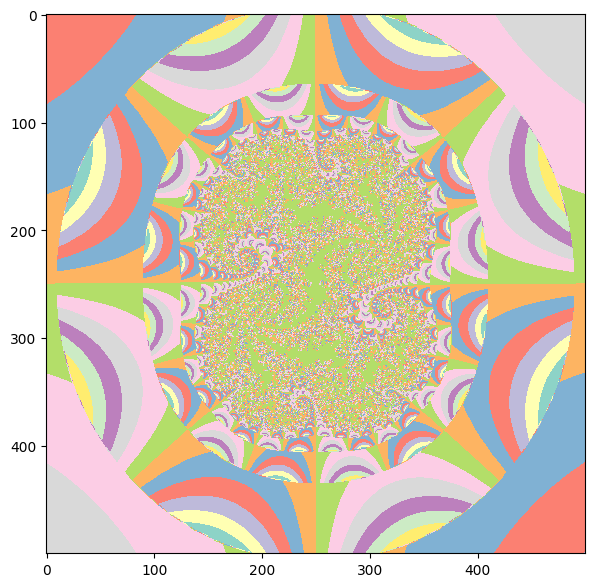

In [3]:
t1 = time.time()
jl = calc_julia(0.279155 + 0.01j)
print ("time:", time.time() - t1)

plt.subplots()[0].set_size_inches(7, 7)
plt.imshow(jl.imag, cmap='Set3')
plt.show()

In [4]:
def calc_julia2(c, bound=2.1, z_max=4.0, n_max=1000):

    step = 2.0 * bound / 1290
    counts = np.zeros((2796+1, 1290+1), dtype=np.int32)

    for i in range(2796 + 1):
        real = -bound-2.5 + i * step
        for j in range(1290 + 1):
            imag = -bound + j * step
            z = real + imag * 1j
            k = 0

            while (z.real * z.real + z.imag * z.imag) < (z_max * z_max) and k < n_max:
                z = z * z + c
                k += 1
            counts[i,j] = k

    return np.asarray(counts)

time: 4.0937910079956055


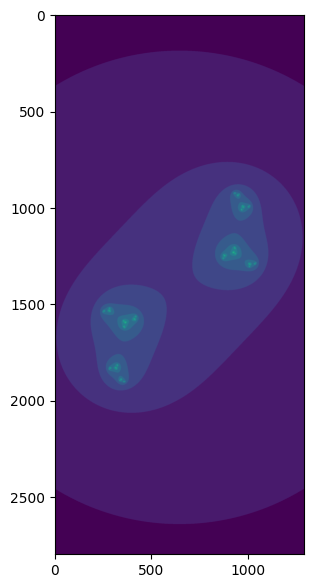

In [5]:
t1 = time.time()
jl = calc_julia2((-0.1 + 2j))
print ("time:", time.time() - t1)

plt.subplots()[0].set_size_inches(7, 7)
plt.imshow(jl)
plt.show()

time: 0.027114391326904297


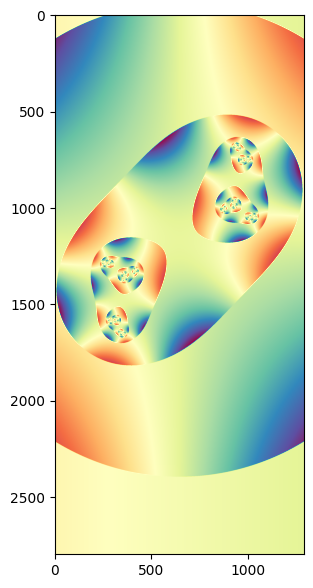

In [6]:
import Julia_c_im
from matplotlib.colors import LinearSegmentedColormap

t1 = time.time()
jl = Julia_c_im.calc_julia((-0.1 + 2j))
print ("time:", time.time() - t1)

colors = [
    
    (0.83529411764705885, 0.24313725490196078 , 0.30980392156862746),
    (0.95686274509803926, 0.42745098039215684 , 0.2627450980392157 ),
    (0.99215686274509807, 0.68235294117647061 , 0.38039215686274508),
    (0.99607843137254903, 0.8784313725490196  , 0.54509803921568623),
    (1.0                , 1.0                 , 0.74901960784313726),
    (0.90196078431372551, 0.96078431372549022 , 0.59607843137254901),
    (0.6705882352941176 , 0.8666666666666667  , 0.64313725490196083),
    (0.4                , 0.76078431372549016 , 0.6470588235294118 ),
    (0.19607843137254902, 0.53333333333333333 , 0.74117647058823533),
    (0.36862745098039218, 0.30980392156862746 , 0.63529411764705879),
    (0.61960784313725492, 0.003921568627450980, 0.25882352941176473)
]

my_cmap = LinearSegmentedColormap.from_list('my_cmap', colors, N=1000)

plt.subplots()[0].set_size_inches(7, 7)
plt.imshow((jl), cmap=my_cmap)
plt.show()

In [7]:
def plot1(i, real, img, my_cmap):
    jl = Julia_c_im.calc_julia((real + img), 1.4)

    fig, ax = plt.subplots()
    fig.set_size_inches(12.90, 27.96)
    fig.patch.set_visible(False)
    ax.axis('off')
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
        
    ax.imshow(jl, cmap=my_cmap)

    plt.savefig('F:\\Temp\\tmp/{:04d}.png'.format(i))
    plt.clf()


In [10]:
from matplotlib._cm_listed import _twilight_data

colors = _twilight_data

counter = 0
ii = 0
real = -0.1
img = -0.64905792j

for i in range(1, 33000000):
    img -= 0.00000008j
    if np.log10(i) - counter < 2.5:
        counter = 0
        colors.append(colors.pop(0))
        my_cmap = LinearSegmentedColormap.from_list('my_cmap', colors)
        plot1(ii, real, img, my_cmap)
        ii += 1
    else:
        counter += 1/((i - ii)**(0.6))

In [9]:
# img -= 0.000005j*2300000
# plot1(1, -0.1, -0.649j, my_cmap)